In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: Predict the obesity class based on various lifestyle factors

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "obesity.csv"
df = pd.read_csv(FILE_PATH) 
df ## Display dataframe

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info() ## Alternatively: df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
## Check for missing data
df.isna().sum() ## Alternative: df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
## Describe data distribution
df.describe(include="all")

Gender          Age       Height       Weight  \
count    2111  2111.000000  2111.000000  2111.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.312600     1.701677    86.586058   
std       NaN     6.345968     0.093305    26.191172   
min       NaN    14.000000     1.450000    39.000000   
25%       NaN    19.947192     1.630000    65.473343   
50%       NaN    22.777890     1.700499    83.000000   
75%       NaN    26.000000     1.768464   107.430682   
max       NaN    61.000000     1.980000   173.000000   

       family_history_with_overweight  FAVC         FCVC          NCP  \
count                            2111  2111  2111.000000  2111.000000   
unique                              2     2          NaN          NaN   
top                               yes   yes          NaN          NaN   
freq                             1726  1866          NaN          NaN   
mean                              NaN   NaN     2.419043     2.685628   
std                               NaN   NaN     0.533927     0.778039   
min                               NaN   NaN     1.000000     1.000000   
25%                               NaN   NaN     2.000000     2.658738   
50%                               NaN   NaN     2.385502     3.000000   
75%                               NaN   NaN     3.000000     3.000000   
max                               NaN   NaN     3.000000     4.000000   

             CAEC SMOKE         CH2O   SCC          FAF          TUE  \
count        2111  2111  2111.000000  2111  2111.000000  2111.000000   
unique          4     2          NaN     2          NaN          NaN   
top     Sometimes    no          NaN    no          NaN          NaN   
freq         1765  2067          NaN  2015          NaN          NaN   
mean          NaN   NaN     2.008011   NaN     1.010298     0.657866   
std           NaN   NaN     0.612953   NaN     0.850592     0.608927   
min           NaN   NaN     1.000000   NaN     0.000000     0.000000   
25%           NaN   NaN     1.584812   NaN     0.124505     0.000000   
50%           NaN   NaN     2.000000   NaN     1.000000     0.625350   
75%           NaN   NaN     2.477420   NaN     1.666678     1.000000   
max           NaN   NaN     3.000000   NaN     3.000000     2.000000   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351  
mean          NaN                    NaN             NaN  
std           NaN                    NaN             NaN  
min           NaN                    NaN             NaN  
25%           NaN                    NaN             NaN  
50%           NaN                    NaN             NaN  
75%           NaN                    NaN             NaN  
max           NaN                    NaN             NaN

### 🤔 What is the difference between df.describe() and df.describe(include="all")?

### Do you know you can type `Ctrl` + `space` to display available options / autocomplete?

You can also learn more about the different input parameters or options from the documentation site.
For example, documentation for describe:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

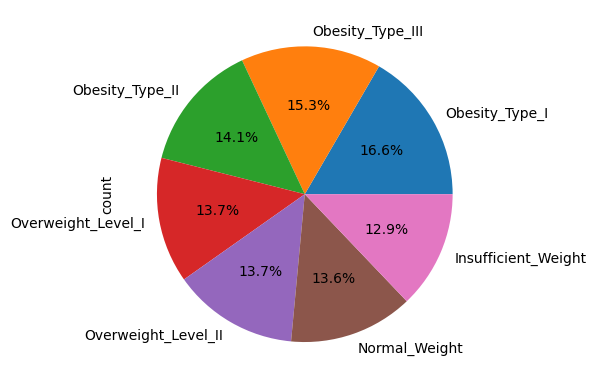

In [6]:
## Understanding distribution of target
col_y = 'NObeyesdad'

## Plot pie chart
df[col_y].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

### 🤔 What might be an issue with using pie charts for data viz? How can we overcome it?

In [7]:
## Tally unique values
df[col_y].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

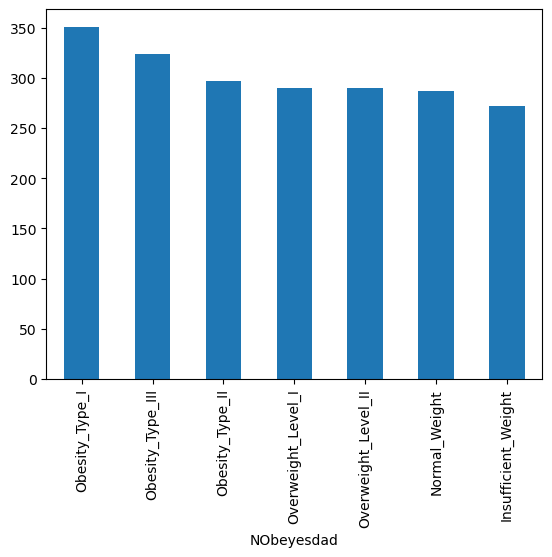

In [8]:
## Plot bar chart
df[col_y].value_counts().plot(kind='bar')
plt.show()

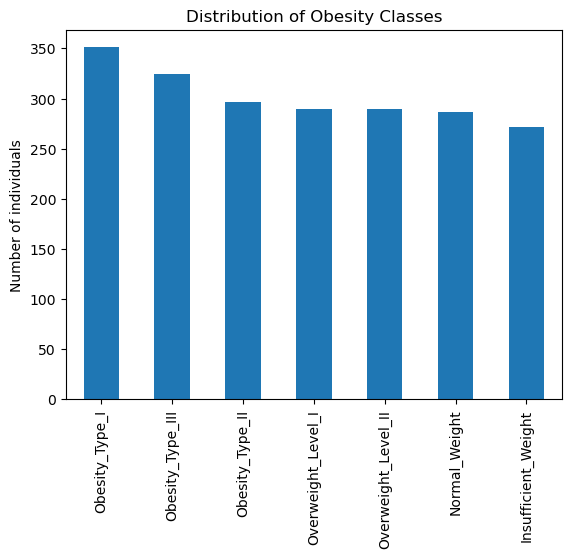

In [9]:
## Plot bar chart
df[col_y].value_counts().plot(kind='bar')

plt.title(f"Distribution of Obesity Classes")
plt.suptitle('')  # Remove default title by Pandas
plt.xlabel("")
plt.ylabel("Number of individuals")
plt.show()

### 2.3.1.2 Understanding distribution of features

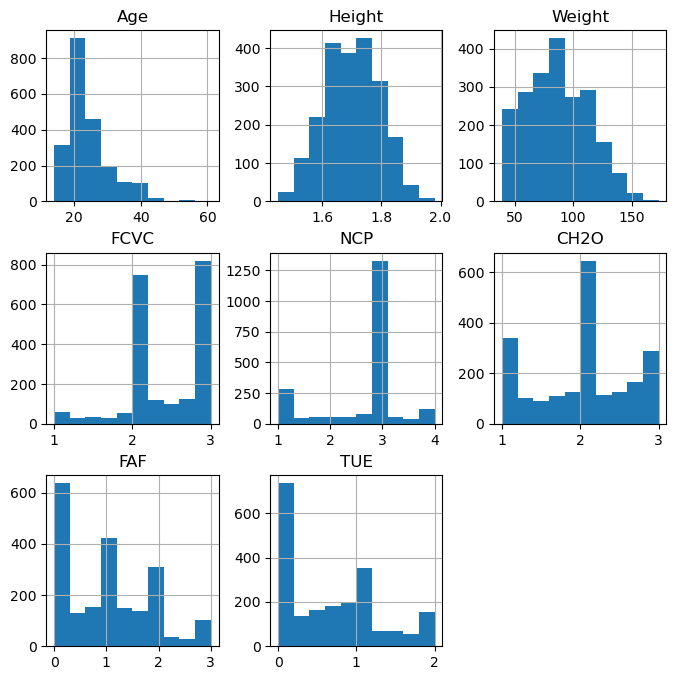

In [10]:
## Plot histogram
df.hist(layout=(3,3), figsize=(8,8))
plt.show()

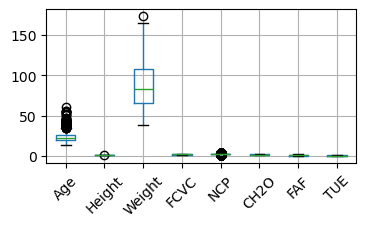

In [11]:
## Plot boxplot for different features
df.boxplot(rot=45, figsize=(4, 2)) ## rot: rotation of label
plt.show()

### 🤔 Challenge: How can we plot class-based boxplots?
Hint: Use what we have learnt in Python Refresher

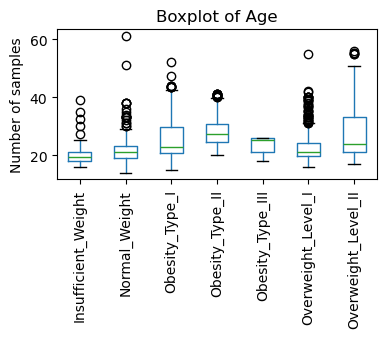

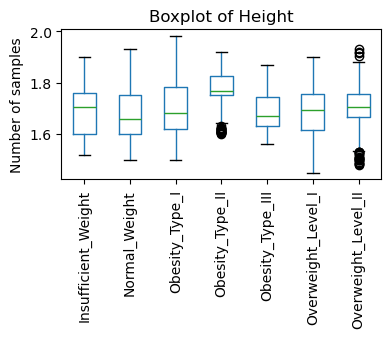

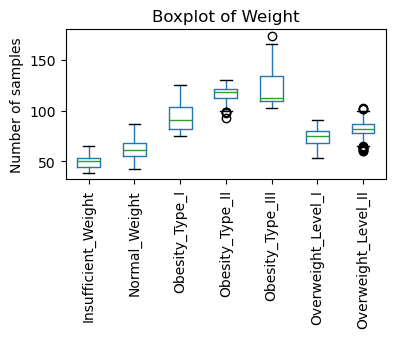

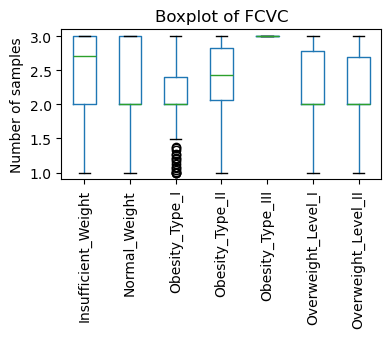

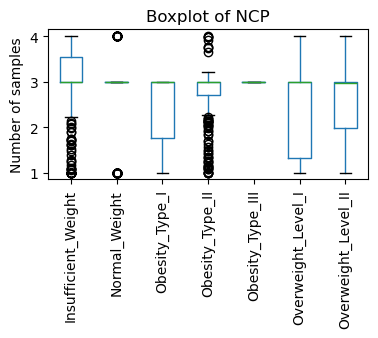

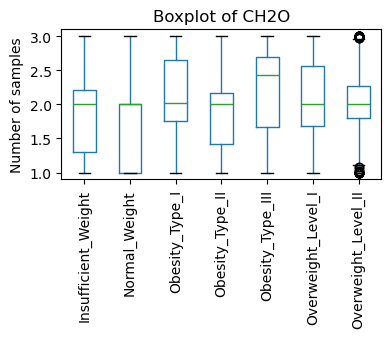

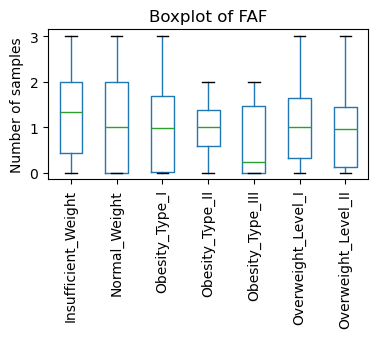

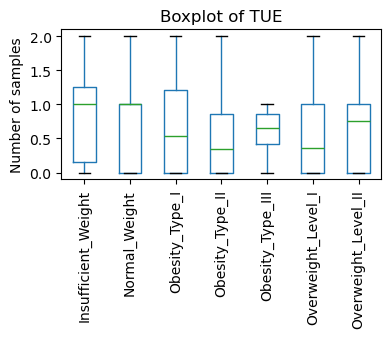

In [12]:
## Plot boxplot for different features grouped by class
for col in df.columns:
    if df[col].dtype==int or df[col].dtype==float:

        df.boxplot(column=col, 
                   by='NObeyesdad', 
                   grid=False, 
                   rot=90, 
                   figsize=(4,2))
        plt.title(f"Boxplot of {col}")
        plt.suptitle('')  # Remove default title by Pandas
        plt.xlabel("")
        plt.ylabel("Number of samples")
        plt.show()

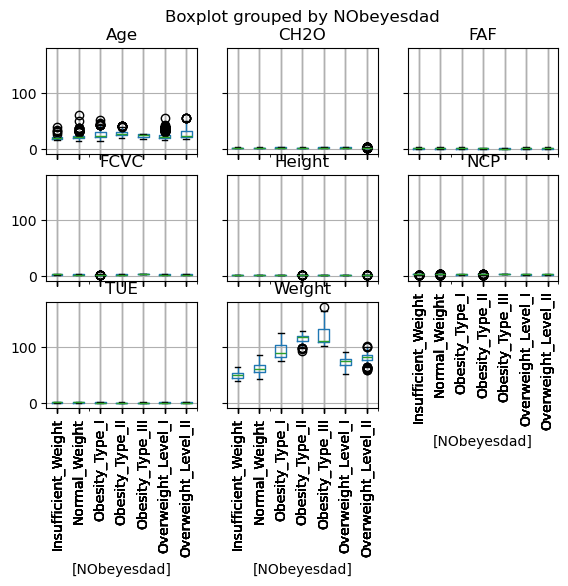

In [13]:
## Alternative way to plot boxplot for different features grouped by class
df.boxplot(by='NObeyesdad', rot=90) ## rot: rotation of label
plt.show()

### 2.3.2 Understanding relationship between variables

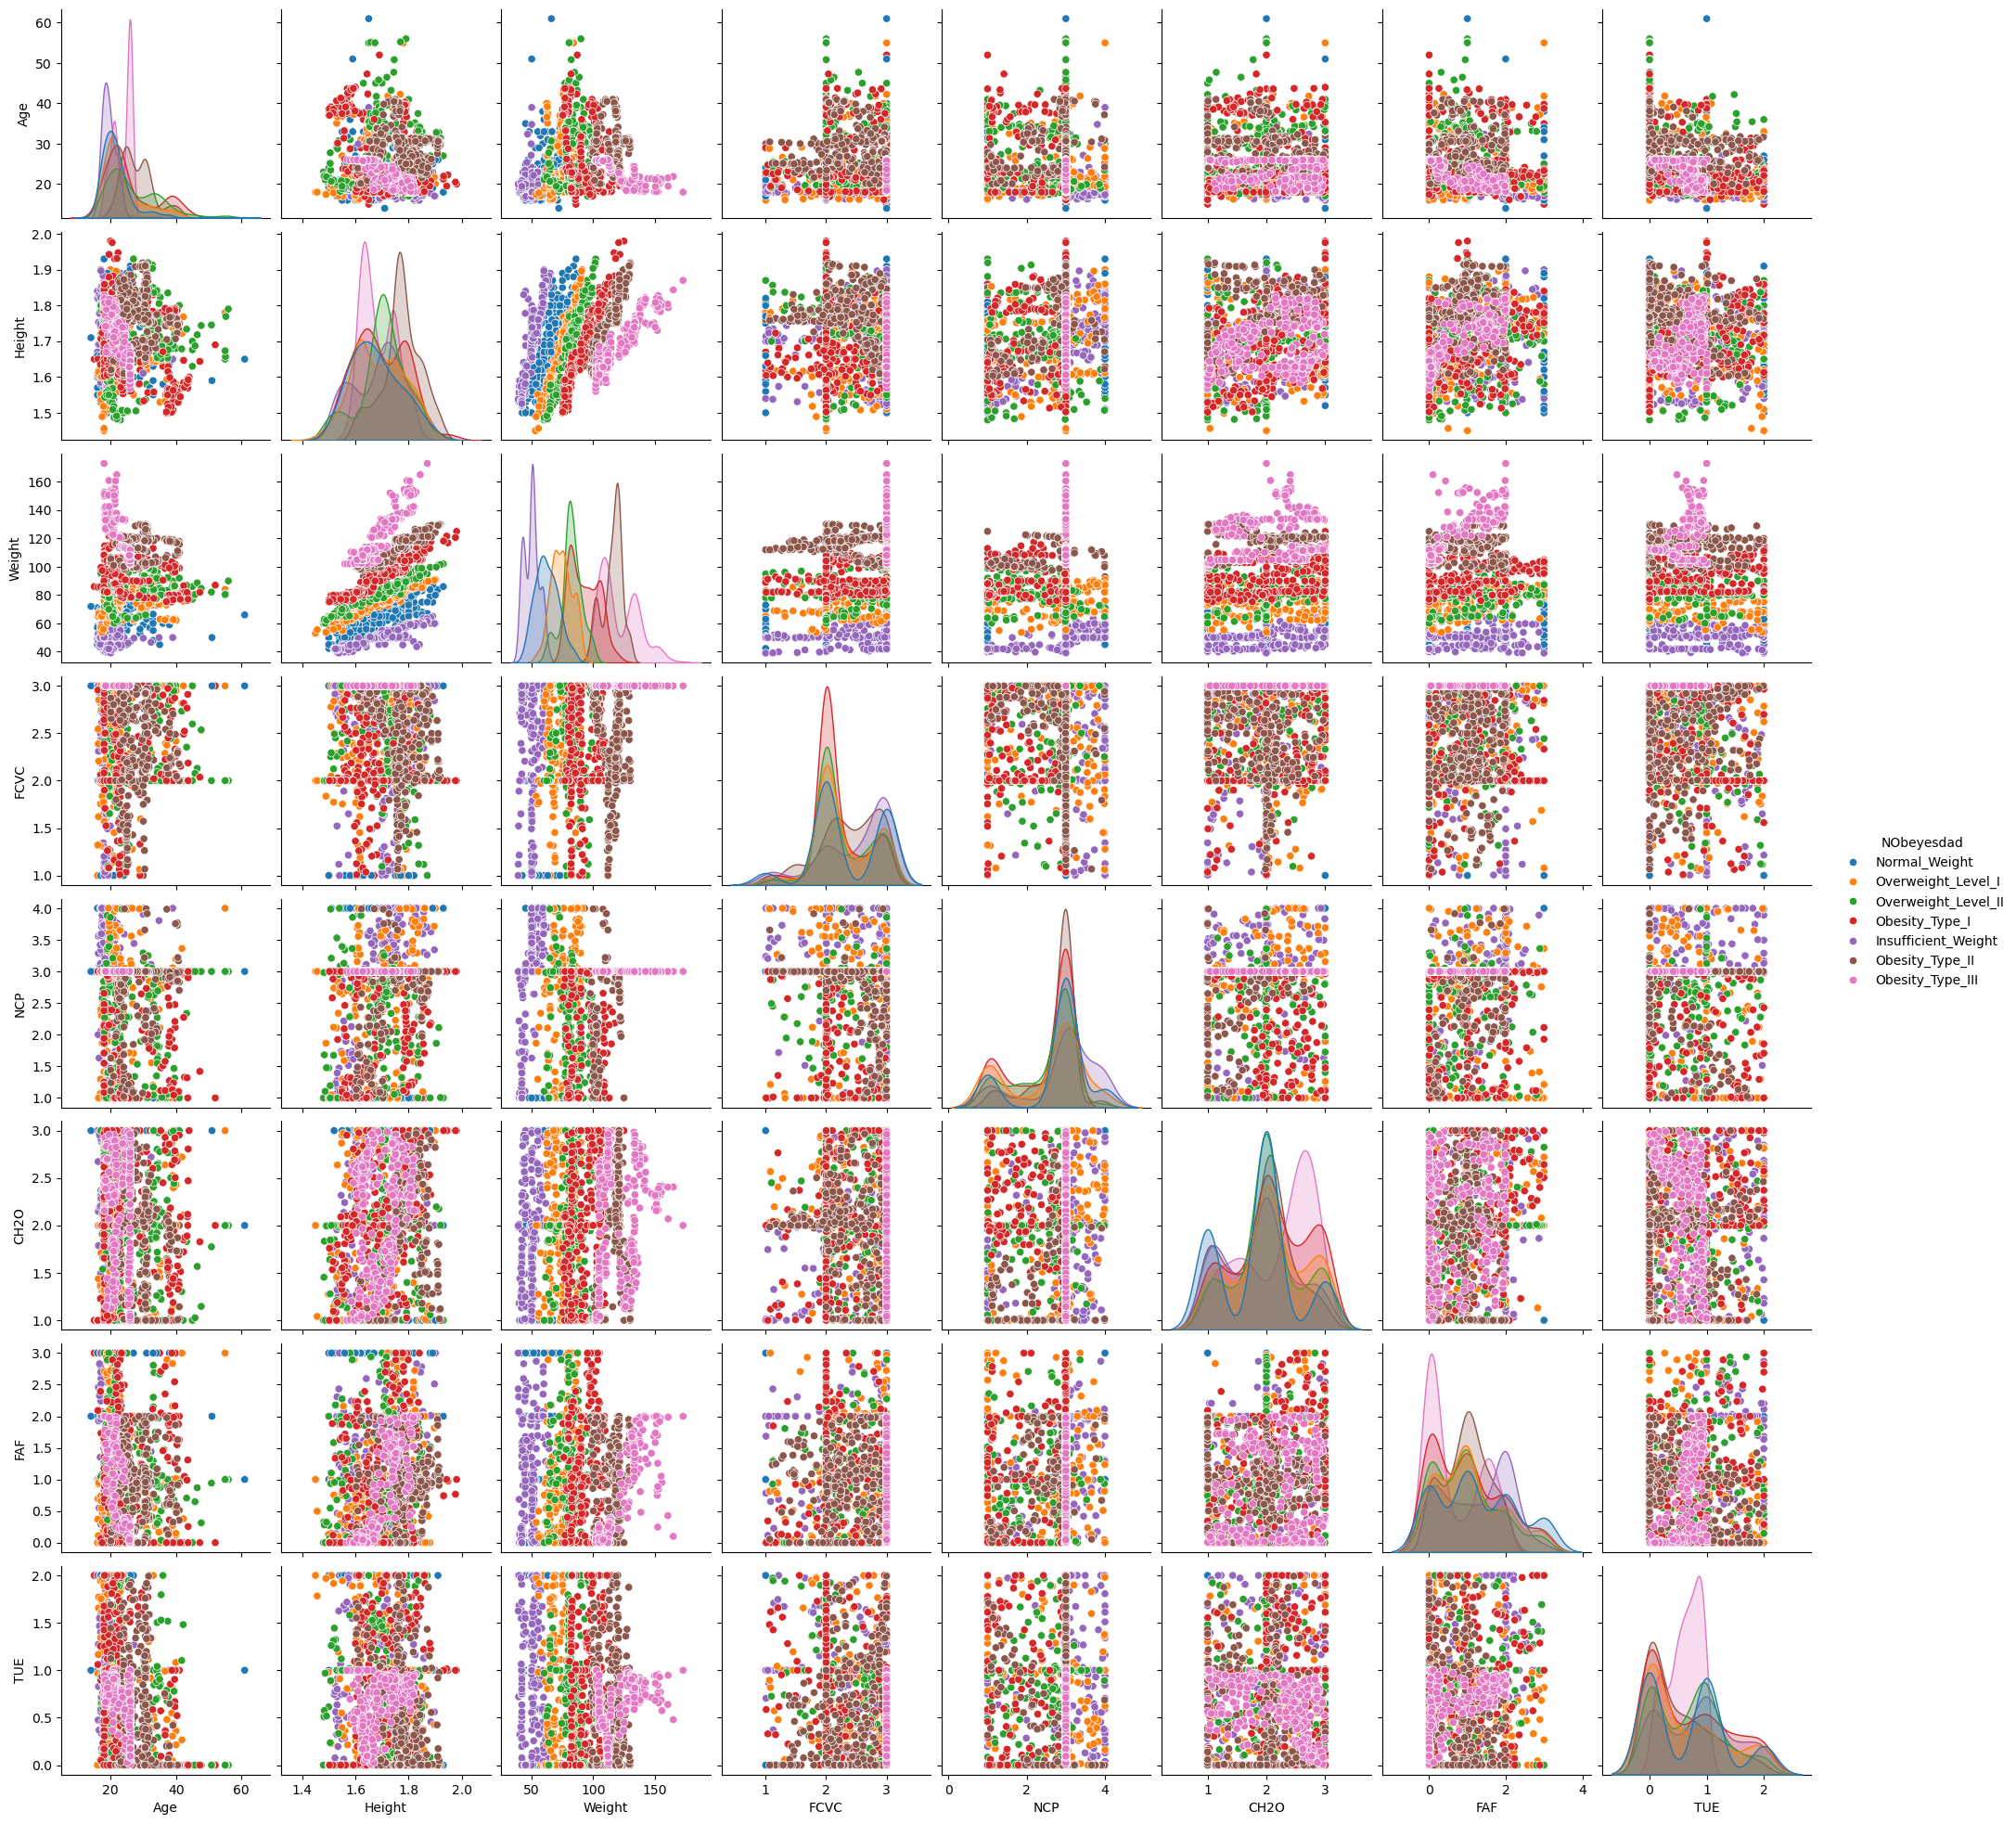

In [14]:
## Plot pairplot
sns.pairplot(df, hue=col_y)
plt.show()

### 🤓 Back to slides 👨🏻‍🏫

# 3. Data Preparation

## 3.1 Data Cleaning

Metadata

| Variable Name                  | Description                                                                                                     |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------- |
| Gender                         |                                                                                                                 |
| Age                            |                                                                                                                 |
| Height                         |                                                                                                                 |
| Weight                         |                                                                                                                 |
| family_history_with_overweight | Has a family member suffered or suffers from overweight?                                                        |
| FAVC                           | Do you eat high caloric food frequently?                                                                        |
| FCVC                           | Do you usually eat vegetables in your meals?                                                                    |
| NCP                            | How many main meals do you have daily?                                                                          |
| CAEC                           | Do you eat any food between meals?                                                                              |
| SMOKE                          | Do you smoke?                                                                                                   |
| CH2O                           | How much water do you drink daily?                                                                              |
| SCC                            | Do you monitor the calories you eat daily?                                                                      |
| FAF                            | How often do you have physical activity?                                                                        |
| TUE                            | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |
| CALC                           | How often do you drink alcohol?                                                                                 |
| MTRANS                         | Which transportation do you usually use?                                                                        |
| NObeyesdad                     | Obesity level                                                                                                   |


### 🤔 Challenge: Which columns contain values that do not make sense? How can we then process them?
Hint: Use what we have learnt in Python Refresher.

You can also try using the `Generate Code` (`Ctrl` + `i`) feature to see if you get the correct cleaned data.

In [15]:
# Select numeric columns
'''
1. Identify columns that are numeric. 
   (Those with decimal places are synthetically generated data.)
2. For each sample, check if the value in any of the column makes sense.
3. If it does not, drop that sample (row).
'''
col_numeric = df.select_dtypes(include=['int64', 'float64']).columns ## Select all numeric columns

col_numeric = [col for col in col_numeric 
               if col not in ['Height', 'Weight']] ## Select relevant columns

df = df[(df[col_numeric] % 1 == 0).all(axis=1)] ## Remove any rows whereby the value is not a round number
df

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0    Female  21.0    1.62    64.0                            yes   no   2.0   
1    Female  21.0    1.52    56.0                            yes   no   3.0   
2      Male  23.0    1.80    77.0                            yes   no   2.0   
3      Male  27.0    1.80    87.0                             no   no   3.0   
4      Male  22.0    1.78    89.8                             no   no   2.0   
..      ...   ...     ...     ...                            ...  ...   ...   
833    Male  21.0    1.62    70.0                             no  yes   2.0   
834    Male  21.0    1.62    70.0                             no  yes   2.0   
921    Male  21.0    1.62    70.0                             no  yes   2.0   
922    Male  21.0    1.62    70.0                             no  yes   2.0   
923    Male  21.0    1.62    70.0                             no  yes   2.0   

     NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0    3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1    3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2    3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3    3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4    1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
..   ...        ...   ...   ...  ...  ...  ...         ...   
833  1.0         no    no   3.0   no  1.0  0.0   Sometimes   
834  1.0         no    no   3.0   no  1.0  0.0   Sometimes   
921  1.0         no    no   3.0   no  1.0  0.0   Sometimes   
922  1.0         no    no   3.0   no  1.0  0.0   Sometimes   
923  1.0         no    no   3.0   no  1.0  0.0   Sometimes   

                    MTRANS           NObeyesdad  
0    Public_Transportation        Normal_Weight  
1    Public_Transportation        Normal_Weight  
2    Public_Transportation        Normal_Weight  
3                  Walking   Overweight_Level_I  
4    Public_Transportation  Overweight_Level_II  
..                     ...                  ...  
833  Public_Transportation   Overweight_Level_I  
834  Public_Transportation   Overweight_Level_I  
921  Public_Transportation   Overweight_Level_I  
922  Public_Transportation   Overweight_Level_I  
923  Public_Transportation   Overweight_Level_I  

[515 rows x 17 columns]

### 🤔 Does that mean that we need to re-do Data Understanding?

Yes! Data Understanding and Data Preparation can be iterative process! 

Data analysts spend a main bulk of their time cleaning data to ensure the data is of high quality. Otherwise, it will be Garbage In Garbage Out.

### 🤔 How do we handle text data?

### 🤓 Back to slides 👨🏻‍🏫

## 3.2 Handling Categorical Data (One-Hot Encoding)

In [16]:
## Check datatypes for each column
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [17]:
## Check datatypes for each column
col_categorical = df.select_dtypes(include=['object']).columns ## Select all categorical columns

## Print data about categorical column
'''
nunique(): Return total number of unique values in column
unique(): Return unique values in column
'''
for col in df[col_categorical]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}') 

Gender (2): ['Female' 'Male']
family_history_with_overweight (2): ['yes' 'no']
FAVC (2): ['no' 'yes']
CAEC (4): ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE (2): ['no' 'yes']
SCC (2): ['no' 'yes']
CALC (4): ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS (5): ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad (7): ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [18]:
## Split data into features (X) and target (y)
y = df[col_y] ## Select target column 

X = df.drop([col_y], axis=1) ## Select feature columns 

## One-Hot Encoding
X = pd.get_dummies(X, 
               drop_first=True ## Remove redundant information
               )
X

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Male  \
0    21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0        False   
1    21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0        False   
2    23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0         True   
3    27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0         True   
4    22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0         True   
..    ...     ...     ...   ...  ...   ...  ...  ...          ...   
833  21.0    1.62    70.0   2.0  1.0   3.0  1.0  0.0         True   
834  21.0    1.62    70.0   2.0  1.0   3.0  1.0  0.0         True   
921  21.0    1.62    70.0   2.0  1.0   3.0  1.0  0.0         True   
922  21.0    1.62    70.0   2.0  1.0   3.0  1.0  0.0         True   
923  21.0    1.62    70.0   2.0  1.0   3.0  1.0  0.0         True   

     family_history_with_overweight_yes  ...  CAEC_no  SMOKE_yes  SCC_yes  \
0                                  True  ...    False      False    False   
1                                  True  ...    False       True     True   
2                                  True  ...    False      False    False   
3                                 False  ...    False      False    False   
4                                 False  ...    False      False    False   
..                                  ...  ...      ...        ...      ...   
833                               False  ...     True      False    False   
834                               False  ...     True      False    False   
921                               False  ...     True      False    False   
922                               False  ...     True      False    False   
923                               False  ...     True      False    False   

     CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0              False           False     True        False             False   
1              False            True    False        False             False   
2               True           False    False        False             False   
3               True           False    False        False             False   
4              False            True    False        False             False   
..               ...             ...      ...          ...               ...   
833            False            True    False        False             False   
834            False            True    False        False             False   
921            False            True    False        False             False   
922            False            True    False        False             False   
923            False            True    False        False             False   

     MTRANS_Public_Transportation  MTRANS_Walking  
0                            True           False  
1                            True           False  
2                            True           False  
3                           False            True  
4                            True           False  
..                            ...             ...  
833                          True           False  
834                          True           False  
921                          True           False  
922                          True           False  
923                          True           False  

[515 rows x 23 columns]

### Side Quest: Curse of Dimensionality

In [19]:
## Sample data
num_sample = 50
df_cod = df[ (df['Height'] > 1.6) & (df['Weight'] > 60) ]
df_cod_sample = df_cod.sample(num_sample, random_state=2025)
df_cod_sample

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
168  Female  22.0    1.73    79.0                            yes  yes   2.0   
242  Female  20.0    1.63    64.0                            yes  yes   1.0   
290    Male  16.0    1.82    71.0                            yes  yes   2.0   
304    Male  20.0    1.80    85.0                            yes   no   2.0   
426    Male  22.0    1.75    70.0                             no   no   2.0   
476  Female  18.0    1.71    75.0                            yes  yes   3.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
0    Female  21.0    1.62    64.0                            yes   no   2.0   
203    Male  29.0    1.69    90.0                            yes   no   2.0   
442    Male  26.0    1.72    65.0                            yes  yes   2.0   
2      Male  23.0    1.80    77.0                            yes   no   2.0   
257    Male  19.0    1.85   115.0                             no   no   2.0   
124    Male  23.0    1.76    90.0                             no  yes   3.0   
424    Male  33.0    1.74    76.0                             no   no   2.0   
3      Male  27.0    1.80    87.0                             no   no   3.0   
371    Male  17.0    1.62    69.0                            yes  yes   3.0   
57     Male  21.0    1.64    65.0                            yes   no   2.0   
381    Male  21.0    1.80    75.0                            yes  yes   3.0   
231  Female  21.0    1.63    66.0                            yes  yes   3.0   
264    Male  18.0    1.87    67.0                            yes  yes   3.0   
922    Male  21.0    1.62    70.0                             no  yes   2.0   
490    Male  24.0    1.75    84.0                             no  yes   3.0   
239  Female  19.0    1.70    64.0                            yes  yes   3.0   
258    Male  18.0    1.70    80.0                             no   no   3.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
255    Male  19.0    1.78    81.0                            yes   no   1.0   
419    Male  29.0    1.62    89.0                            yes  yes   1.0   
21   Female  52.0    1.69    87.0                            yes  yes   3.0   
38     Male  23.0    1.65    67.0                            yes  yes   2.0   
311    Male  17.0    1.72    62.0                             no  yes   2.0   
270    Male  23.0    1.82   107.0                             no  yes   2.0   
486    Male  23.0    1.75    75.0                             no  yes   2.0   
120  Female  23.0    1.67    75.0                            yes  yes   2.0   
360    Male  20.0    1.87    75.0                             no  yes   2.0   
834    Male  21.0    1.62    70.0                             no  yes   2.0   
259  Female  18.0    1.67    91.0                            yes  yes   1.0   
58   Female  17.0    1.65    67.0                            yes  yes   3.0   
89   Female  29.0    1.70    78.0                            yes  yes   3.0   
153    Male  34.0    1.69    84.0                            yes   no   2.0   
314  Female  26.0    1.65    63.0                             no  yes   3.0   
192    Male  20.0    1.83    85.0                            yes   no   3.0   
435  Female  19.0    1.76    80.0                            yes  yes   2.0   
87     Male  19.0    1.82    87.0                            yes  yes   2.0   
406    Male  33.0    1.76    66.5                             no   no   2.0   
42   Female  21.0    1.66    64.0                            yes  yes   1.0   
262    Male  18.0    1.74    70.0                             no  yes   2.0   
347    Male  17.0    1.80    97.0                            yes  yes   2.0   
128    Male  20.0    1.72    70.0                            yes  yes   3.0   
119  Female  19.0    1.63    76.0                            yes   no   3.0   
100  Female  21.0    1.69    63.0                      

In [20]:
## Visualize only 2 features
df_cod_sample['dummy_feature'] = 1
col_cod_X = 'Height'
col_cod_y = 'Weight'
col_cod_z = 'dummy_feature'

import plotly.express as px
fig = px.scatter_3d(df_cod_sample, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

In [21]:
## Visualize one more additional features (i.e., 3 features)
col_cod_X = 'Height'
col_cod_y = 'Weight'
col_cod_z = 'Age' ## Add one more feature

import plotly.express as px
fig = px.scatter_3d(df_cod_sample, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

## Notice how spread out the data is
## Some parts of the graph are lacking in data, since # dimensions increased but # rows did not change


In [22]:
## Visualize whole dataset based on 3 features
col_cod_X = 'Height'
col_cod_y = 'Weight'
col_cod_z = 'Age'

import plotly.express as px
fig = px.scatter_3d(df_cod, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

## Notice how the distribution / spread of data has changed

## 3.3 Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2025 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

### 🤓 Back to slides 👨🏻‍🏫

# 4. Modelling

### 4.2 Train Model

In [24]:
from sklearn.linear_model import LogisticRegression
## Initialise model 1
logr = LogisticRegression(max_iter=200) ## Logistic Regression model
logr.fit(X_train, y_train) ## Train model


## Initialise model 2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis() ## Linear Discriminant Analysis model
lda.fit(X_train, y_train) ## Train model

c:\ProgramData\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LinearDiscriminantAnalysis()

### 🤓 Back to slides 👨🏻‍🏫

# 5. Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score

## Evaluate model 1
y_pred_logr = logr.predict(X_test) ## Prediction using model 1
print("Logistic Regression: ", accuracy_score(y_test, y_pred_logr)) ## Calculate accuracy of model 1

## Evaluate model 2
y_pred_lda = lda.predict(X_test) ## Prediction using model 2
print("Linear Discriminant Analysis: ", accuracy_score(y_test, y_pred_lda)) ## Calculate accuracy of model 2

Logistic Regression:  0.6387096774193548
Linear Discriminant Analysis:  0.8709677419354839


### 🤓 Back to slides 👨🏻‍🏫

### 🤔 Challenge: How do we predict the species based on new unseen measurement data?

In [26]:
## New data
X_unseen = [ ['Female',	21,	1.62, 64, 'yes', 'no', 2, 3, 'Sometimes', 'no', 2, 'no', 0, 1, 'no', 'Public_Transportation'] ## sample 1
             ]

## Convert to OHE Pandas dataframe
col_df_X = df.drop(col_y, axis=1).columns ## Select feature columns
col_ohe = X.columns.tolist() ## Select feature column names after OHE

X_unseen = pd.DataFrame(X_unseen, columns=col_df_X) ## Convert to Pandas dataframe
X_unseen = pd.get_dummies(X_unseen, drop_first=True) ## OHE
X_unseen = X_unseen.reindex(columns=col_ohe, fill_value=0) ## Provide OHE columns
display(X_unseen) 

## Predict
logr.predict(X_unseen)

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Male  \
0   21    1.62      64     2    3     2    0    1            0   

   family_history_with_overweight_yes  ...  CAEC_no  SMOKE_yes  SCC_yes  \
0                                   0  ...        0          0        0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0                0               0        0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             0               0  

[1 rows x 23 columns]

array(['Normal_Weight'], dtype=object)